In [1]:
import os
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DATA_ROOT_DIR = os.getcwd()

Generate with:
```bash
cdo -P 8 -f nc2 -gtc,0 -remapcon,r2880x1440 -topo landmask.nc
````


In [3]:
landmask2880x1440 = xr.open_dataset(os.path.join(f"{DATA_ROOT_DIR}/landmask2880x1440.nc"))
landmask2880x1440["topo"].values

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

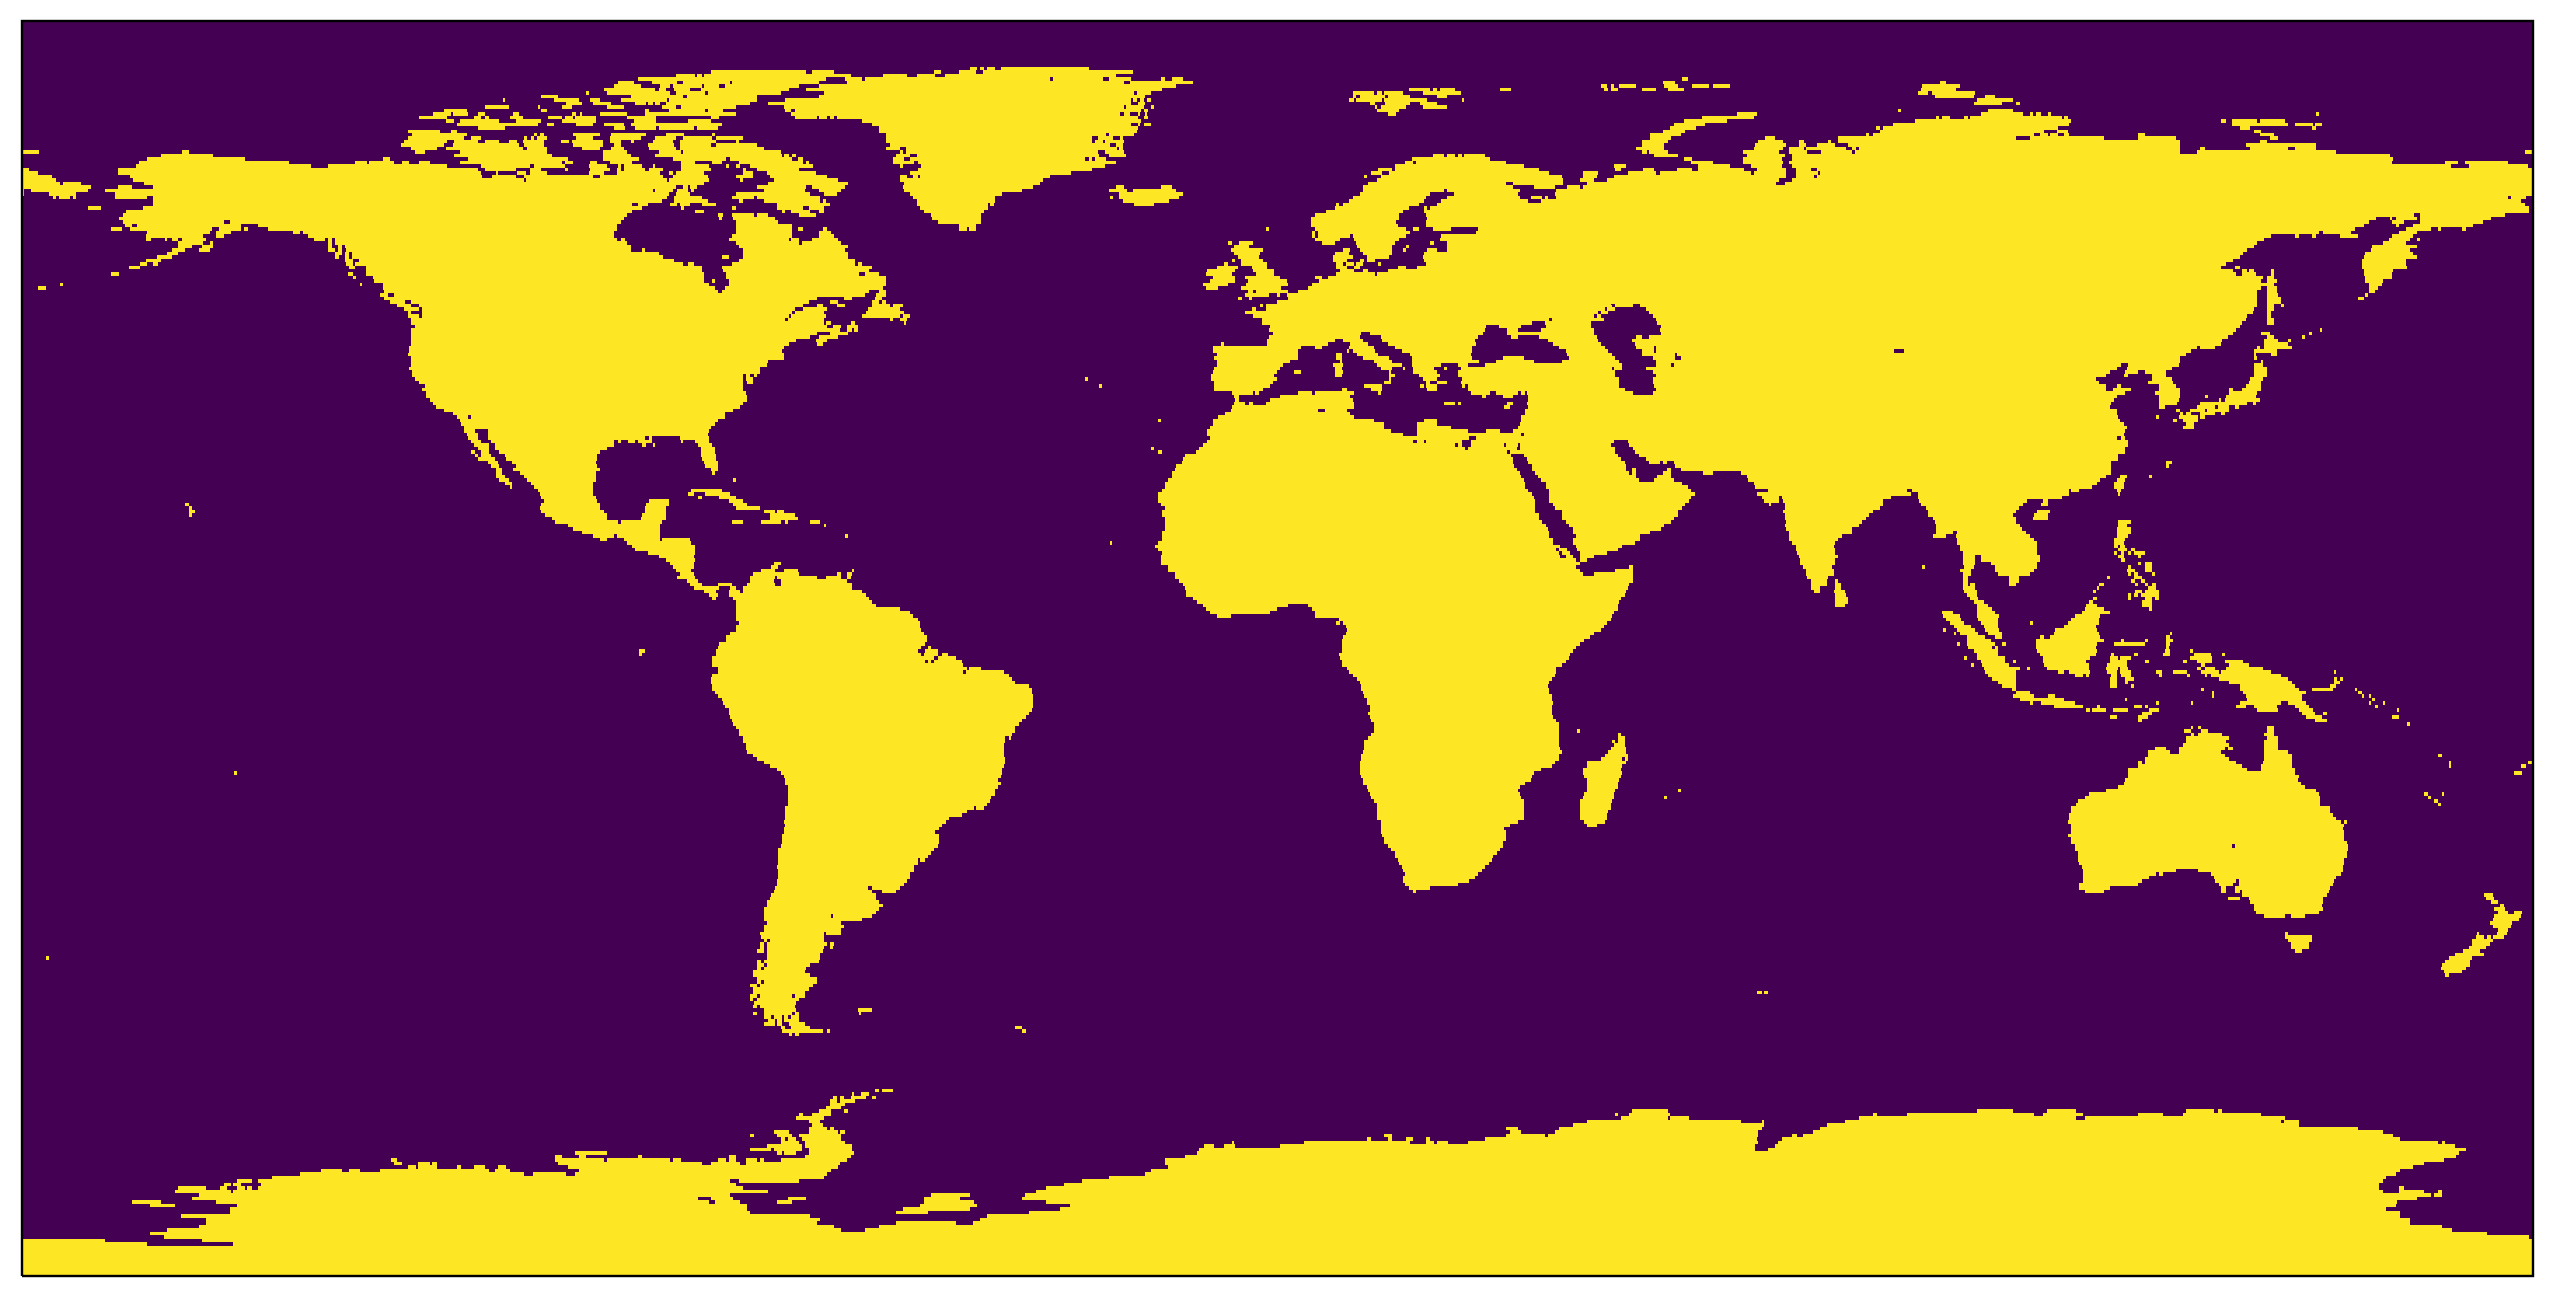

In [4]:
plt.figure(figsize=(15,10), dpi=216)
ax = plt.subplot(projection=ccrs.PlateCarree())
landmask2880x1440["topo"].plot(add_colorbar=False);

# Creating Custom Landmasks 

# Global Land Sea Masks

get high resolution mask
> cdo -P 8 -f nc2 -gtc,0 -remapcon,r2880x1440 -topo landmask.nc

get grid of gewünschte dataset
> cdo -topo,glob_tas_yearmean_EUR_1971-2000.nc glob_targetGrid.nc

set landmask grid 
> cdo remapbil,glob_targetGrid.nc landmask.nc landmask_glob_EUR.nc 